Séries Temporais - demonstração do funcionamento com dados do Bitcoin

In [ ]:
# Exemplo de série temporal com Python. 
#importando o Pandas, o IO para leitura do arquivo e a biblioteca datetime
# os dados do bitcoin foram obtidos em: https://coinmarketcap.com/

import pandas as pd
import io
from datetime import datetime

In [ ]:
# carregando dados para o Google Colab
from google.colab import files
uploaded = files.upload()

Saving ST-aula2-bitcoin.csv to ST-aula2-bitcoin (4).csv


In [ ]:
# carregando o arquivo para o dataframe bitcoin
bitcoin = pd.read_csv(io.BytesIO(uploaded['ST-aula2-bitcoin.csv']))

In [ ]:
# visualizar os dados carregados
bitcoin.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Sep 30, 2021",41551.27,44092.60,41444.58,43790.90,31141681925,824619217608
1,"Sep 29, 2021",41064.98,42545.26,40829.67,41564.36,30602359905,782651228474
2,"Sep 28, 2021",42200.90,42775.15,40931.66,41034.54,30214940550,772639687709
3,"Sep 27, 2021",43234.18,44313.25,42190.63,42235.73,30980029059,795216175345
4,"Sep 26, 2021",42721.63,43919.30,40848.46,43208.54,30661222077,813490665613


Cada coluna do arquivo bitcoin.csv significa o seguinte:

**Date:** informa o dia em que os dados foram registrados

**Open**: valor de abertura do bitcoin considerando 12:01 AM UTC

**High**: valor máximo obtido pelo bitcoin no dia

**Low**: valor mínimo obtido pelo bitcoin no dia

**Close**: valor de fechamento do bitcoin considerando 11:59 PM UTC

**Volume**: volume de bitcoins negociados no dia

**Market Cap**: valor total de todas as ações de uma empresa, é a capitalização de mercado

In [ ]:
# identificar o tamanho da base de dados
bitcoin.shape

(638, 7)

In [ ]:
# verificar o tipo dos dados da variável Date
type(bitcoin.loc[0]['Date'])

str

In [ ]:
# convertendo o campo date para ser do tipo datetime
bitcoin['Date'] = pd.to_datetime(bitcoin['Date'])

# verificando a conversão, deve aparecer: pandas._libs.tslibs.timestamps.Timestamp
type(bitcoin.loc[0]['Date'])

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
# visualizar os dados carregados para verificar a mudança
bitcoin.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2021-09-30,41551.27,44092.60,41444.58,43790.90,31141681925,824619217608
1,2021-09-29,41064.98,42545.26,40829.67,41564.36,30602359905,782651228474
2,2021-09-28,42200.90,42775.15,40931.66,41034.54,30214940550,772639687709
3,2021-09-27,43234.18,44313.25,42190.63,42235.73,30980029059,795216175345
4,2021-09-26,42721.63,43919.30,40848.46,43208.54,30661222077,813490665613


In [ ]:
# acessando a primeira linha do dataframe bitcoin e identificando qual foi o dia da semana
# o comando day_name tem esta função

bitcoin.loc[0]['Date'].day_name()

'Thursday'

In [ ]:
# adicionaremos o dia da semana no nosso dataframe
bitcoin['Week Day'] = bitcoin['Date'].dt.day_name()

In [ ]:
# visualizar os dados carregados para verificar a mudança
bitcoin.head()

,Date,Open,High,Low,Close,Volume,Market Cap,Week Day
0,2021-09-30,41551.27,44092.60,41444.58,43790.90,31141681925,824619217608,Thursday
1,2021-09-29,41064.98,42545.26,40829.67,41564.36,30602359905,782651228474,Wednesday
2,2021-09-28,42200.90,42775.15,40931.66,41034.54,30214940550,772639687709,Tuesday
3,2021-09-27,43234.18,44313.25,42190.63,42235.73,30980029059,795216175345,Monday
4,2021-09-26,42721.63,43919.30,40848.46,43208.54,30661222077,813490665613,Sunday


In [ ]:
# em uma série histórica é importante conehcer a abrangência da série. 
# para isto vamos localizar a data mais antiga da série utilizando o comando:

bitcoin['Date'].min()

Timestamp('2020-01-02 00:00:00')

In [ ]:
# para localizar a data máxima do período devemos utilizar o comando:

bitcoin['Date'].max()

Timestamp('2021-09-30 00:00:00')

In [ ]:
# para obter o intervalo de tempo basta subtrair a data mais antiga da data mais recente:

bitcoin['Date'].max() - bitcoin['Date'].min()

Timedelta('637 days 00:00:00')

In [ ]:
# para selecionar períodos específicos da série temporal podemos utilizar janelas de tempo nos períodos selecionados
# vamos tratar a série considerando o período iniciando a partir do mês de Abril:

janela = (bitcoin['Date'] >= 'April 2020')
bitcoin.loc[janela].head()

,Date,Open,High,Low,Close,Volume,Market Cap,Week Day
0,2021-09-30,41551.27,44092.60,41444.58,43790.90,31141681925,824619217608,Thursday
1,2021-09-29,41064.98,42545.26,40829.67,41564.36,30602359905,782651228474,Wednesday
2,2021-09-28,42200.90,42775.15,40931.66,41034.54,30214940550,772639687709,Tuesday
3,2021-09-27,43234.18,44313.25,42190.63,42235.73,30980029059,795216175345,Monday
4,2021-09-26,42721.63,43919.30,40848.46,43208.54,30661222077,813490665613,Sunday


In [ ]:
# podemos ter janelas com períodos mais bem definidos, possibilitando gerar análises mais direcionadas
# vamos criar uma janela considerando o mês de fevereiro: 

# criando a janela de tempo:
janela2020 = (bitcoin['Date'] >= datetime(2020, 1, 1)) & (bitcoin['Date'] <= datetime(2020, 12, 31))

# visualizando o resultado:
bitcoin.loc[janela2020].head()

,Date,Open,High,Low,Close,Volume,Market Cap,Week Day
273,2020-12-31,28841.57,29244.88,28201.99,29001.72,46754964848,539051138108,Thursday
274,2020-12-30,27360.09,28937.74,27360.09,28840.95,51287442704,536033807161,Wednesday
275,2020-12-29,27081.81,27370.72,25987.30,27362.44,45265946774,508523687097,Tuesday
276,2020-12-28,26280.82,27389.11,26207.64,27084.81,49056742893,503339329917,Monday
277,2020-12-27,26439.37,28288.84,25922.77,26272.29,66479895605,488213268382,Sunday


In [ ]:
# ajustando o índice do DataFrame para que seja considerado a coluna Date
# para isto devemos utilizar o método set_index()

bitcoin.set_index('Date', inplace=True)

In [ ]:
# tornando a coluna Date como índice possibilita fazer consultas de forma mais simplificada na série temporal, sem precisar criar janelas
# como exemplo listaremos os registros referentes a janeiro

bitcoin['January 2020'].head()

,Open,High,Low,Close,Volume,Market Cap,Week Day
Date,,,,,,,
2020-01-31,9508.31,9521.71,9230.78,9350.53,29432489719,170112778161,Friday
2020-01-30,9316.02,9553.13,9230.90,9508.99,32378792851,172978577931,Thursday
2020-01-29,9357.47,9406.43,9269.47,9316.63,30682598115,169460984603,Wednesday
2020-01-28,8912.52,9358.59,8908.45,9358.59,34398744403,170205617955,Tuesday
2020-01-27,8597.31,8977.73,8597.31,8909.82,28647338393,162027957435,Monday


In [ ]:
# podemos utilizar funções para realizar análises
# por exemplo obter a média dos valores de uma coluna em um determinado intervalo de tempo
# para exemplificar vamos obter a média do fechamento (Close) para o mês de Janeiro e Fevereiro:

bitcoin['2020-02':'2020-01']['Close'].mean()

9019.629491525422

In [ ]:
# outro exemplo é obtendo o valor máximo obtido pelo bitcoin nos 10 primeiros dias de janeiro:

bitcoin['2020-01-10':'2020-01-01']['High'].max()

8396.74

In [ ]:
# na série temporal podemos precisar fazer análises considerando diversas colunas e trabalhando com períodos pré definidos
# por exemplo analisando os dados semanalmente
# normalmente não realizamos o mesmo tipo de análise nas colunas utilizadas, podemos ter uma análise diferente para cada informação
# por exemplo obter valor máximo semanal (High), o valor mínimo semanal (Low) e a média do valor de fechamento (Close)

# a função a ser utilizada é a resample(), que realiza uma reamostragem dos dados de séries temporais
# somado com a função agg(), que consegue agregar várias operações em colunas definidas
# assim podemos realizar agregações como sum(), mean(), median(), min() e max()

bitcoin.resample('W').agg({'Close': 'mean', 'High': 'max', 'Low': 'min'})


,Close,High,Low
Date,,,
2020-01-05,7288.082500,7544.50,6915.00
2020-01-12,8041.202857,8396.74,7409.29
2020-01-19,8725.835714,9164.36,8079.70
2020-01-26,8557.291429,8792.99,8266.84
2020-02-02,9311.687143,9553.13,8597.31
...,...,...,...
2021-09-05,49159.975714,51868.68,46562.44
2021-09-12,46868.017143,52853.76,43285.21
2021-09-19,47260.195714,48791.78,43591.32


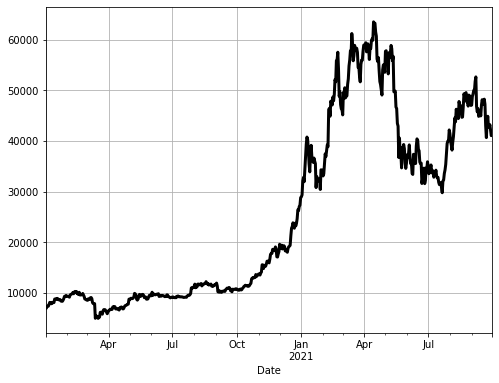

In [ ]:
# o estudo das séries temporais utiliza muitos gráficos
# como exemplo vamos utilizar um gráfico de linha projetando as variações do valor de abertura diário (Open)

bitcoin['Open'].plot(figsize=(8,6), grid=True, c='k', linewidth=3)

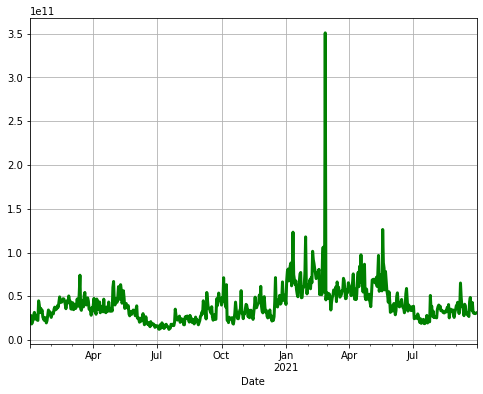

In [ ]:
# vamos projetar as variações do volume diário (Volume)

bitcoin['Volume'].plot(figsize=(8,6), grid=True, c='g', linewidth=3)